# Mathematik für Biologiestudierende

Wintersemester 2025/26

16.12.2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

# Wiederholung (interaktiv)

Gehen Sie auf die Website

* https://pingo.coactum.de

und geben Sie folgende Zugangsnummer ein

* **670719**

oder scannen Sie den QR-Code

![QR-Code](bilder/qr02.png)

# Themen heute

* Z-Test
* Effektstärke 
* Poweranalyse beim t-Test
* Q-Q-Plot
* Nicht-parametrische Tests
* Wilcoxons signed-rank-Test

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
import seaborn as sns
sns.set_theme()
sns.set_context('talk')
import pandas as pd
from scipy import stats

# Z-Test

* Gegeben sind Zufallsvariable $X_1, \dots, X_n$ und $Y_1, \dots, Y_n$
* Verteilungsvoraussetzungen:
  * Alle $X_j$ sind normalverteilt mit unbekanntem Erwartungswert $\mu_1$ und *bekannter* Varianz $\sigma^2$
  * Alle $Y_j$ sind normalverteilt mit unbekanntem Erwartungswert $\mu_2$ und *bekannter* Varianz $\sigma^2$
  * Die beiden Varianzen müssen also gleich und bekannt sein (unrealistisch)
* Ziel: $\mu_1$ und $\mu_2$ sollen verglichen werden

* $x_j$ und $ _j$ seien Realisierungen (d.h., die Daten)
* $z_j = x_j - y_j$ seien die Differenzen
* Bestimme arithmetischen Mittelwert
$$      \overline z = \frac1n \sum_{j=1}^n z_j   $$

* Die *Teststatistik* ist
$$        t = \frac{\overline z}\sigma \cdot \sqrt{n}  $$
* also dieselbe wie beim t-Test für verbundene Stichproben
* Die Teststatistik wird mit einem Quantil der Standardnormalverteilung verglichen (anstelle eines Quantils der t-Verteilung mit der richtigen Anzahl an Freiheitsgraden)
* bei großen Stichprobenumfängen ist der Unterschied gering

# Effektstärke

* Ein Medikament soll bei einer fortschreitenden Bewegungserkrankung die Verschlechterung aufhalten
* 900 Patienten bekommen das Verum, weitere 900 ein Placebo
* Zu den Zeitpunkten $t_0$ (Anfangszeitpunkt) und $t_1$ (Endzeitpunkt) wird die Beweglichkeit durch geschultes Personal auf einer Skala von 1 (schlecht) bis 100 (perfekt) eingeordnet.  

In [2]:
treatment = pd.read_csv('https://www.math.uni-duesseldorf.de/~braun/bio2526/treatment.csv', index_col=0)
treatment

,t0,t1,Treatment
0,43,35,Verum
1,63,64,Verum
2,71,66,Verum
3,64,55,Verum
4,73,73,Verum
...,...,...,...
1764,60,54,Placebo
1765,48,46,Placebo
1766,54,53,Placebo
1767,81,76,Placebo


In [3]:
treatment['Difference'] = treatment.t1 - treatment.t0
treatment

,t0,t1,Treatment,Difference
0,43,35,Verum,-8
1,63,64,Verum,1
2,71,66,Verum,-5
3,64,55,Verum,-9
4,73,73,Verum,0
...,...,...,...,...
1764,60,54,Placebo,-6
1765,48,46,Placebo,-2
1766,54,53,Placebo,-1
1767,81,76,Placebo,-5


* In der Spalte "Difference" steht die Differenz zwischen den beiden Zeitpunkten.  Idealerweise ist sie positiv, wenn das Medikament sogar zu einer Verbesserung des Zustands führt

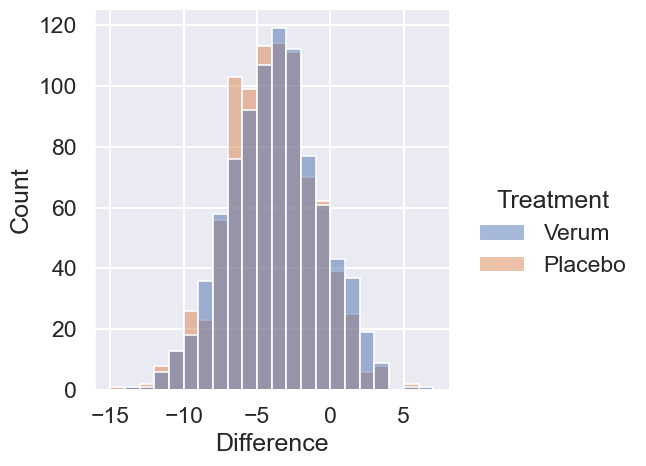

In [4]:
sns.displot(treatment, x='Difference', hue='Treatment', bins=np.arange(-15, 8));

* Der Test soll zeigen, dass die Differenz bei den Probanden mit Verum im Mittel größer als bei den anderen ist
* Einseitiger, unverbundener Test

In [5]:
verum = treatment[treatment.Treatment=='Verum']
verum.describe()

,t0,t1,Difference
count,887.000000,887.000000,887.000000
mean,62.616685,58.396843,-4.219842
std,12.253146,12.486847,3.130375
min,29.000000,21.000000,-14.000000
25%,54.000000,50.000000,-6.000000
50%,62.000000,58.000000,-4.000000
75%,71.000000,67.000000,-2.000000
max,100.000000,96.000000,6.000000


In [6]:
placebo = treatment[treatment.Treatment=='Placebo']
placebo.describe()

,t0,t1,Difference
count,882.000000,882.000000,882.000000
mean,62.175737,57.630385,-4.545351
std,11.728762,12.272701,3.028560
min,28.000000,23.000000,-15.000000
25%,54.000000,49.000000,-7.000000
50%,62.000000,58.000000,-5.000000
75%,69.000000,65.750000,-3.000000
max,100.000000,96.000000,5.000000


* Aus der Gruppe der Probanden mit Verum sind 13 Leute ausgeschieden
* aus der anderen 18

In [7]:
stats.ttest_ind(verum.Difference, placebo.Difference, alternative='greater')

TtestResult(statistic=2.2224928684720053, pvalue=0.01318808737727292, df=1767.0)

Die Nullhypothese, dass das Medikament nicht besser wirkt als Placebo, kann zum Signifikanzniveau $\alpha=0.015$ abgelehnt werden. 

## Effektstärke

* Der *p*-Wert gibt an, wie wahrscheinlich es ist, dass die beobachtete Änderung auf Zufall zurückzuführen ist

* Das ist aber nicht die einzige wichtige Kennzahl
* Die *Effektstärke* gibt an, wie stark sich die Daten verändern

* Durch große Stichprobenumfänge kann auch bei geringer Effektstärke eine signifikante Bepbachtung gemacht werden

Beim Vergleich zweier Mittelwerte wird "Cohen's d" zur Messung der Effektstärke verwendet  

$$
    d = \left| \frac{\overline x - \overline y}s \right|
$$

wobei $\overline x$ und $\overline y$ die beiden Mittelwerte, $s$ die Stichprobenstreuung und $|a|$ den Betrag von $a$ bezeichnet.

* Bei verbundenen Stichproben verwendet man die Stichprobenstreuung der Differenz
* Bei unverbundenen Stichproben verwendet man die Standardabweichung der gepoolten Stichproben

In [8]:
anz_verum = verum.Difference.count()
anz_verum

887

In [9]:
anz_placebo = placebo.Difference.count()
anz_placebo

882

In [10]:
mean_verum = verum.Difference.mean()
mean_verum

-4.219842164599775

In [11]:
mean_placebo = placebo.Difference.mean()
mean_placebo

-4.545351473922903

In [12]:
std_verum = verum.Difference.std()
std_placebo = placebo.Difference.std()

In [13]:
zaehler = (anz_verum-1)*std_verum**2 + (anz_placebo-1)*std_placebo**2
nenner = anz_verum + anz_placebo - 2
sp = np.sqrt(zaehler/nenner)
sp

3.0800319638117295

In [14]:
d = (mean_verum - mean_placebo) / sp
d

0.10568374391812818

Die Effektstärke hat den Wert 0.11

### Interpretation der Effektstärke

| d-Wert | Interpretation   |
|--------|------------------|
| 0.2    | geringer Effekt  |
| 0.5    | mittlerer Effekt |
| 0.8    | starker Effekt   |

Wir haben also einen sehr geringen Effekt beobachtet

* der niedrige *p*-Wert zeigt, dass das Medikament wirkt
* das zugrundeliegende physiologische Modell ist also bestätigt

* die geringe Effektstärke zeigt, dass die individuelle Wirkung nicht groß ist

# Power-Analyse beim t-Test

Power:  Wahrscheinlichkeit, dass die Nullhypothese abgelehnt wird, wenn tatsächlich die Alternative gilt

Bauer Pillenhuber wird verdächtigt, seine Bio-Hühnchen mit Antibiotika vollzudröhnen.  Wir wollen das durch Blutuntersuchungen nachweisen.  

* Es handelt sich um den Vergleich mit einem Referenzwert, also einen verbundenen t-Test
* Er ist einseitig

* Wie viele Tiere müssen untersucht werden?
* Wir erwarten einen starken Effekt, sagen wir d=0.7
* Wir verlangen ein Signifikanzniveau von $\alpha=0.01$, um niemanden zu Unrecht zu verdächtigen

In [15]:
import statsmodels.stats.power as smp   

* Die Bibliothek `statsmodels` enthält weitere statistische Funktionen über `scipy.stats` hinaus

* die "klassischen" statistischen Funktionen befinden sich meist in `scipy.stats`
* darauf aufbauende Funktionen in `statsmodels`

In [16]:
poweranalyse = smp.TTestPower()

In [17]:
poweranalyse.power(effect_size=0.7, alpha=0.01, nobs=10, alternative="larger")

0.3306090909980096

* `nobs`: number of observations
* `effect_size`: erwartete Effektstärke
  * hier kann auch eine Liste angegeben werden
* `alpha`: Signifikanzniveau
* Rückgabewert:  Power unter Zugrundelegung dieser Daten

* Achtung:  in `statsmodels` lauten die Alternativen
  * `larger`
  * `smaller`
  * `two-sided`  (Voreinstellung)

* bei `scipy.stats` sind das
  * `greater`
  * `less`
  * `two-sided`  (Voreinstellung)

## Grafische Bestimmung der Power in Abhängigkeit vom Stichprobenumfang

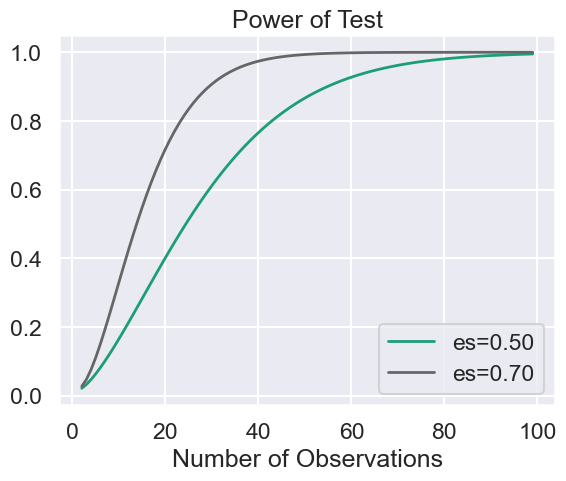

In [18]:
poweranalyse.plot_power(effect_size=[0.5,0.7], alpha=0.01, nobs=np.arange(2,100), 
                         alternative='larger');

Wir sollten 35 Hühner untersuchen

In [19]:
poweranalyse.power(effect_size=0.7, alpha=0.01, nobs=35, alternative='larger')

0.9502228587369882

## Power-Analyse für unverbundene t-Tests

* Wir wollen wissen, ob auf sandigem Boden das Verhältnis von Kiefern zu Fichten ein anderes als auf lehmigem ist
* Wir erwarten einen mittleren Effekt
* Wir wählen den Standardwert $\alpha=0.05$

* Es handelt sich um einen unverbundenen Test
* Sie wählen $n_1$ sandige und $n_2=n_1$ lehmige Waldparzellen aus
* Wie groß müssen $n_1$ und $n_2$ sein?

In [20]:
poweranalyse = smp.TTestIndPower()  # Ind = Independent

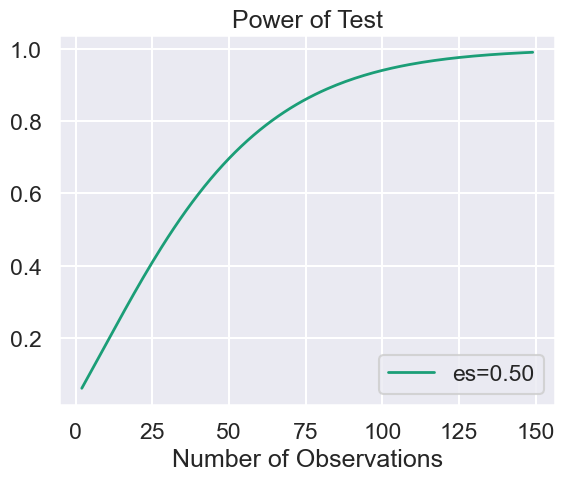

In [21]:
poweranalyse.plot_power(effect_size=[0.5], alpha=0.05, nobs=np.arange(2,150));

Wir müssen ca 105 Parzellen von jeder Sorte ansehen, um eine Power von knapp 95% zu erreichen

In [22]:
poweranalyse.power(effect_size=0.5, alpha=0.05, nobs1=105, ratio=1)

0.9501287033889152

* `ratio` ist das Verhältnis $\frac{n_2}{n_1}$
* Man plant eigentlich immer mit `ratio=1`
* Dann kann man diese Angabe bei `poweranalyse.power` weglassen

### Ausschnittsvergrößerung aus dem Bild

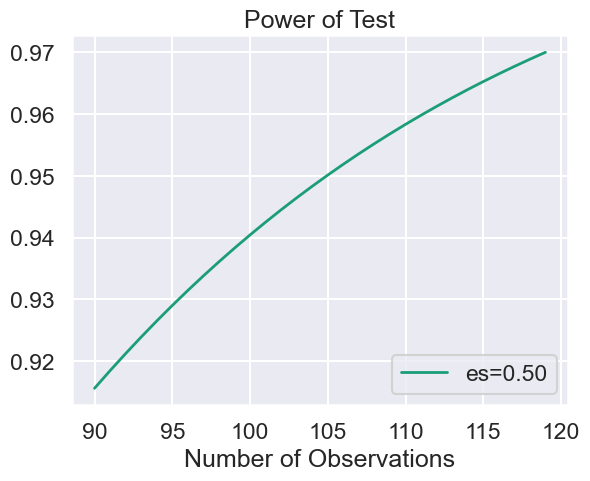

In [23]:
poweranalyse.plot_power(effect_size=[0.5], alpha=0.05, nobs=np.arange(90,120));

# Normalverteilungsannahmen

### t-Test zum Vergleich zweier Erwartungswerte bei verbundenen Stichproben

* Gegeben sind Zufallsvariable $X_1, \dots, X_n$ und $Y_1, \dots, Y_n$
* Verteilungsvoraussetzungen:
  * Alle $X_j$ sind **normalverteilt** mit unbekanntem Erwartungswert $\mu_1$ und unbekannter Varianz $\sigma^2$
  * Alle $Y_j$ sind normalverteilt mit unbekanntem Erwartungswert $\mu_2$ und unbekannter Varianz $\sigma^2$
  * Die beiden Varianzen müssen also gleich sein
* Ziel: $\mu_1$ und $\mu_2$ sollen verglichen werdenm

# Q-Q-Plot

Wie überprüfen wir die Gültigkeit der Verteilungsannahme?

* Mit dem Quantil-Quantil-Plot kann man auf graphischem Wege beurteilen, ob Messwerte Realisierungen einer normalverteilten Zufallsvariablen sind
* Man trägt dazu auf der $x$-Achse die Quantile der Standardnormalverteilung und auf der $y$-Achse die Quantile der
    Beobachtungsdaten auf
* Wenn diese Punkte annähernd auf einer Geraden liegen, sind die Daten näherungsweise normalverteilt, ansonsten nicht

* es gibt auch Testverfahren, um auf Normalverteilungsannahmen zu testen
* nicht ganz klar, wie sinnvoll das ist

#### Beispiel 

In [24]:
import statsmodels.api as sm

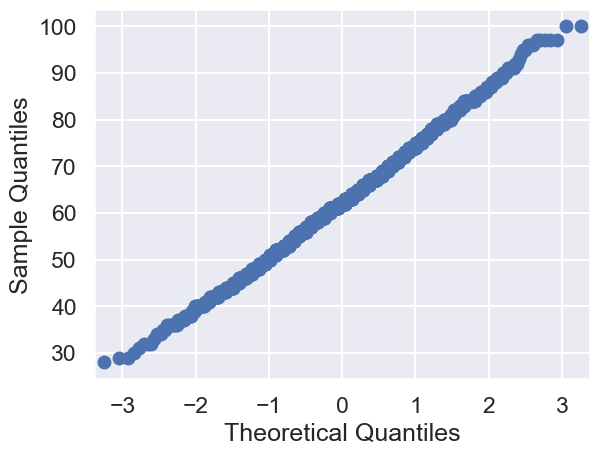

In [25]:
pp = sm.ProbPlot(treatment.t0)
pp.qqplot();

Wunderbar normalverteilt

#### Beispiel Galapagos Inseln

Ein Datensatz zum Buch "Linear Models with Python" von Faraway

In [26]:
galapagos = pd.read_csv("https://www.math.uni-duesseldorf.de/~braun/bio2526/galapagos.csv")
galapagos.head()

,Island,Species,Area,Elevation,Nearest,Scruz,Adjacent
0,Baltra,58,25.09,346,0.6,0.6,1.84
1,Bartolome,31,1.24,109,0.6,26.3,572.33
2,Caldwell,3,0.21,114,2.8,58.7,0.78
3,Champion,25,0.10,46,1.9,47.4,0.18
4,Coamano,2,0.05,77,1.9,1.9,903.82


* echte Daten von 30 Galapagos-Inseln
* für jede Galapagos-Insel wurde erhoben
  * `Species`: Anzahl verschiedener (Säuge)tierarten
  * `Area`: Fläche
  * `Elevation`: höchster Punkt
  * `Nearest`: Abstand zur nächsten Insel
  * `Scruz`: Entfernung von Santa Cruz
  * `Adjacent`: Fläche der nächstgelegenen Insel

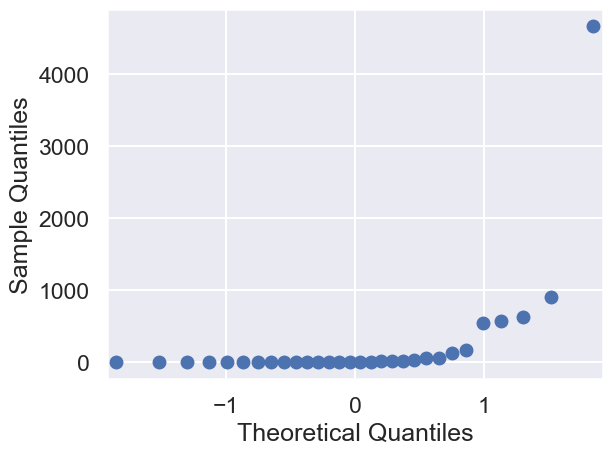

In [27]:
pp = sm.ProbPlot(galapagos.Area)
pp.qqplot();

Klar nicht normalverteilt

# Nicht-parametrische Tests

Beispiel für Situationen, in denen man nicht-parametrische Tests macht:

* Wenn die Verteilungsannahmen nicht erfüllt sind
* Wenn die Stichprobenumfänge zu klein sind

## Vergleich zweier Mediane

* Bei Zufallsvariablen, die nicht normalverteilt sind, ist der Erwartungswert oft bedeutungslos
* Man vergleicht dann besser die Mediane

In [28]:
galapagos.Area.describe()

count      30.000000
mean      261.708667
std       864.110519
min         0.010000
25%         0.257500
50%         2.590000
75%        59.237500
max      4669.320000
Name: Area, dtype: float64

## Vergleich zweier Erwartungswerte bzw. zweier Mediane

|Vergeich                 | parametrisch                        |   nicht-parametrisch |
|-------------------------|-------------------------------------|----------------------|
|mit Referenzwert         | t-Test für verbundene Stichproben   | Wilcoxon-Test        |
|vorher-nachher           | t-Test für verbundene Stichproben   | Wilcoxon-Test        |
|verschiedene Populationen| t-Test für unverbundene Stichproben | Mann-Whitney-U-Test  |
|was wird verglichen?     | Erwartungswert                      | Median               |

# Wilcoxon-Signed-Rank-Test

* Den Wilcoxon Test verwendet man zum Vergleich der Mediane verbundener Datensätze, wenn die Normalverteilungsannahme nicht gesichert ist

* Bei normalverteilten Daten ist der Wilcoxon-Test ebenfalls zulässig, aber meist etwas schwächer

Als Beispiel rechnen wir die Schadstoffkonzentration auch noch einmal als Wilcoxon-Signed-Rank-Test

In [29]:
u = "https://www.math.uni-duesseldorf.de/~braun/bio2324/data/schadstoffe.csv"
schadstoffe = pd.read_csv(u, index_col=0)
schadstoffe.head()

,Messstelle,Konzentration
0,5,0.000867
1,3,0.000490
2,1,0.000589
3,1,0.000950
4,4,0.001152


* Wir vergleichen die Konzentration mit dem Referenzwert 0.08

In [30]:
res = stats.wilcoxon(schadstoffe.Konzentration, 0.0008, alternative="greater")
res

WilcoxonResult(statistic=2169.0, pvalue=0.004229703509534525)

Zum Vergleich:

In [31]:
stats.ttest_rel(schadstoffe.Konzentration, 0.0008, alternative="greater")

TtestResult(statistic=2.768040010585661, pvalue=0.0035114445640696246, df=79)

* Der Unterschied der p-Werte ist gering
* Der Wert der Statistik ist verschieden, weil der Test völlig anders arbeitet

## Effektstärke beim Wilcoxon-Test

* beim Wilcoxon-Test bestimmt man die Effektstärke mit *Cohen's r*
* dazu ist es erforderlich, den Test noch einmal mit `method="approx"` zu rechnen, um die z-Statistik zu bekommen

* Formel
$$ r = \frac{|z|}{\sqrt n} $$
* hierbei ist $z$ der Wert der z-Statistik 
* und $n$ der Stichprobenumfang

In [32]:
res = stats.wilcoxon(schadstoffe.Konzentration, 0.0008, alternative="greater", method="approx")
res

WilcoxonResult(statistic=2169.0, pvalue=0.004229703509534525)

In [33]:
res.zstatistic

2.6331616685404655

In [34]:
n = schadstoffe.Konzentration.count()
n

80

In [35]:
r = abs(res.zstatistic / np.sqrt(n))
r

0.2943964243301625

### Interpretation der Effektstärke für Cohen's r

| r-Wert | Interpretation   |
|--------|------------------|
| 0.1    | geringer Effekt  |
| 0.3    | mittlerer Effekt |
| 0.5    | starker Effekt   |

Wir haben also einen mittleren Effekt beobachtet